# I : notebook_EDA introduction

### I / A : Data dictionary

1. longitude
2. latitude
3. housingMedianAge: Âge médian d'une maison dans un pâté de maisons ; un chiffre plus bas correspond à un bâtiment plus récent.
4. totalRooms: Nombre total de chambres dans un bloc
5. totalBedrooms: Nombre total de chambres dans un bloc
6. population: Nombre total de personnes résidant dans un bloc
7. households: Nombre total de ménages, c'est-à-dire un groupe de personnes résidant dans une unité d'habitation, pour un bloc
8. medianIncome: Revenu médian des ménages dans un bloc de maisons (mesuré en dizaines de milliers de dollars US)
9. medianHouseValue: Valeur médiane des maisons pour les ménages d'un bloc (mesurée en dollars US)
10. oceanProximity: Situation de la maison par rapport à la mer

### I / B : Goal of this notebook.
In this notebook, we will do our Exploratory Data Analysis for the Silicon Valley project.
We will try to do that in a specific order and with comments in order to explain these different steps.

# II : Preliminary steps

### II / A : Importing libraries 

In [1]:
# Here, we import the libraries that we will use later.

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# ScikitLearn import
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### II / B : Importing and copying our dataset 

In [2]:
# We import the dataset from our folder, using pd.read_csv()
raw_df = pd.read_csv('data/4054a881-9509-4cc0-9501-1174d5bbf6fc.txt')
raw_df

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


In [3]:
# Lets get rid of the first column, which is not in the dataset that we use
raw_df = raw_df.drop("Unnamed: 0", axis=1)
raw_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
16507,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


In [4]:
# Now we will create a copy of this dataframe, in order to keep it without clean and do all the changes inside the copy.
# This copy will be the dataframe that we will use.
clean_df = raw_df.copy()
clean_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
16507,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


In [5]:
# We can use .info() on this new dataframe to have a short preview of these data.
clean_df.info()

# 1st info: We have 10 columns, 9 features and 1 target (median_house_value).
# 2nd info: one of the feature seems to have missing data (total_bedrooms).
# 3rd info: all the features are of type float64, except for the ocean_proximity.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16336 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


#### We are done with preliminary steps, and now we can go to the EDA

# III : Exploratory Data Analysis

### III / A : Basic exploration

In [6]:
# We want to have a short description of different statistics of our dataset, using .describe()
clean_df.describe()

# 1st info: there's a scale difference between some of our features, so maybe we will need to scale the data if needed.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16336.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.564046,35.626523,28.624516,2644.170603,539.319540,1435.017260,501.135962,3.864091,206509.251453
std,2.005033,2.139150,12.597980,2213.946369,425.207704,1158.151967,385.650673,1.893244,115225.957661
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1446.000000,296.000000,788.000000,280.000000,2.562500,119400.000000
50%,-118.490000,34.250000,29.000000,2116.000000,435.000000,1168.000000,410.000000,3.531300,179300.000000
75%,-118.010000,37.710000,37.000000,3154.000000,647.000000,1738.000000,606.000000,4.733225,264500.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### III / B : Duplicates and outliers

In [7]:
# We can also check if we have duplicated rows. If yes, we will remove the duplicate one 
# because it could lead to wrong predictions with our model.
clean_df.duplicated().sum()

# 1st info: the dataset has no duplicated rows.

0

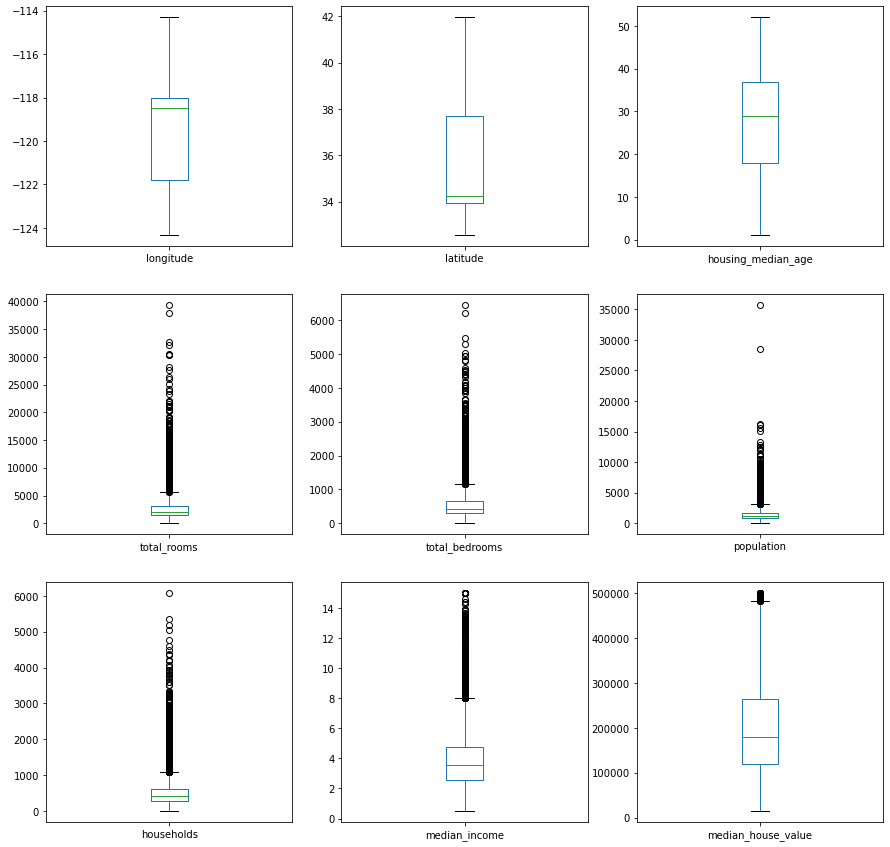

In [14]:
# For the outliers, we can boxplot our features to see if we have outliers.
clean_df.plot(kind='box', subplots=True, layout=(3, 3), figsize = (15, 15));

# 1st info: There's a lot of outliers in many features (total_rooms, total_bedrooms, population, households, median_income)
# I will keep them for the first iterations.

In [9]:
# We will remove some outliers for each feature, using the boxplot above to eliminate the most obvious one.
# We will do that in an other iteration.
clean_df[clean_df['households'] > 4900]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4185,-121.44,38.43,3.0,39320.0,6210.0,16305.0,5358.0,4.9516,153700.0,INLAND
13152,-117.78,34.03,8.0,32054.0,5290.0,15507.0,5050.0,6.0191,253900.0,<1H OCEAN
13922,-117.74,33.89,4.0,37937.0,5471.0,16122.0,5189.0,7.4947,366300.0,<1H OCEAN
14503,-121.79,36.64,11.0,32627.0,6445.0,28566.0,6082.0,2.3087,118800.0,<1H OCEAN


### III / B : Univariate EDA

In [30]:
# We will create a new function for a preview of each feature
def univariate_analysis(variable, stats):
    plt.subplot(1,2,1)
    sns.histplot(variable)
    plt.title("Histogram chart")
    plt.subplot(1,2,2)
    sns.boxplot(data=variable,orient="v")
    plt.title("Box plot")
    plt.subplots_adjust(wspace=0.5)
    if stats == True:
        print('Univariate preview')
        print(variable.describe())

Univariate preview
count    16512.000000
mean        28.624516
std         12.597980
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64


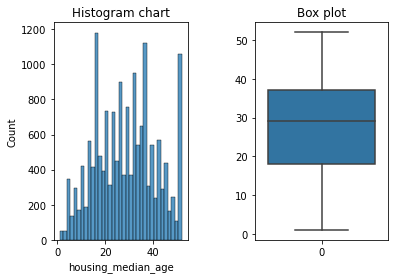

In [32]:
# Univariate preview for housing_median_age feature
univariate_analysis(clean_df.housing_median_age, True)

Univariate preview
count    16512.000000
mean      2644.170603
std       2213.946369
min          6.000000
25%       1446.000000
50%       2116.000000
75%       3154.000000
max      39320.000000
Name: total_rooms, dtype: float64


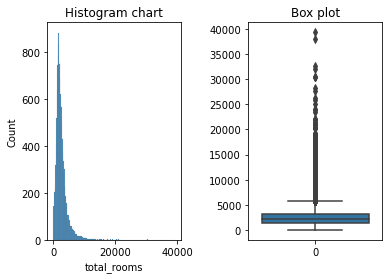

In [33]:
# Univariate preview for total_rooms feature
univariate_analysis(clean_df.total_rooms, True)

Univariate preview
count    16336.000000
mean       539.319540
std        425.207704
min          2.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64


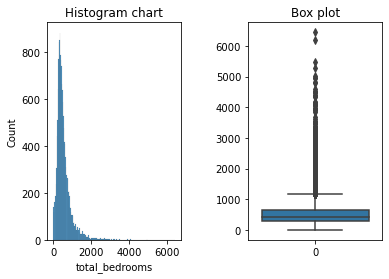

In [34]:
# Univariate preview for total_bedrooms feature
univariate_analysis(clean_df.total_bedrooms, True)

Univariate preview
count    16512.000000
mean      1435.017260
std       1158.151967
min          3.000000
25%        788.000000
50%       1168.000000
75%       1738.000000
max      35682.000000
Name: population, dtype: float64


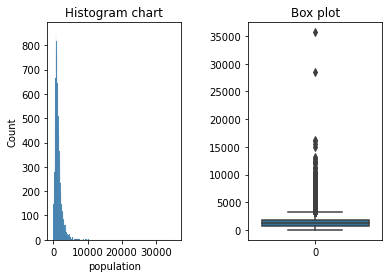

In [36]:
# Univariate preview for population feature
univariate_analysis(clean_df.population, True)

Univariate preview
count    16512.000000
mean       501.135962
std        385.650673
min          2.000000
25%        280.000000
50%        410.000000
75%        606.000000
max       6082.000000
Name: households, dtype: float64


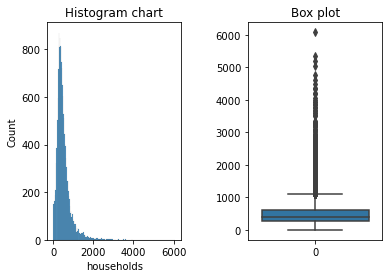

In [37]:
# Univariate preview for households feature
univariate_analysis(clean_df.households, True)

Univariate preview
count    16512.000000
mean         3.864091
std          1.893244
min          0.499900
25%          2.562500
50%          3.531300
75%          4.733225
max         15.000100
Name: median_income, dtype: float64


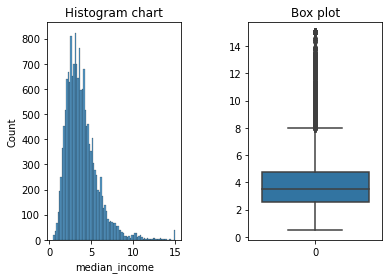

In [38]:
# Univariate preview for median_income feature
univariate_analysis(clean_df.median_income, True)

Univariate preview
count     16512.000000
mean     206509.251453
std      115225.957661
min       14999.000000
25%      119400.000000
50%      179300.000000
75%      264500.000000
max      500001.000000
Name: median_house_value, dtype: float64


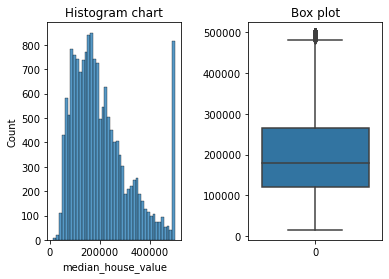

In [39]:
# Univariate preview for median_house_value feature
univariate_analysis(clean_df.median_house_value, True)

In [ ]:
# Univariate preview for median_house_value feature
univariate_analysis(clean_df.median_house_value, True)

### III / B : Splitting dataframe (train and test)

In [17]:
# We need to split our dataframe, because we want one train_df (70% of data) and one test_df (30% of data)
train_df, test_df = train_test_split(clean_df, train_size=0.7, test_size=0.3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14146,-122.30,37.53,38.0,984.0,171.0,429.0,157.0,5.3261,376800.0,NEAR OCEAN
13816,-118.11,33.83,37.0,1249.0,202.0,517.0,189.0,4.4196,223100.0,<1H OCEAN
7483,-117.69,34.03,20.0,6374.0,1412.0,3690.0,1350.0,3.4184,162500.0,INLAND
3062,-116.58,32.69,19.0,4085.0,876.0,2133.0,718.0,2.9190,116500.0,INLAND
11817,-120.85,35.37,21.0,1033.0,195.0,588.0,187.0,2.8173,226900.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
9325,-117.60,33.87,18.0,6450.0,1165.0,3716.0,1113.0,4.2721,150300.0,INLAND
16408,-121.92,37.29,34.0,943.0,135.0,378.0,139.0,5.1765,344600.0,<1H OCEAN
4730,-117.84,33.90,24.0,1723.0,223.0,707.0,219.0,7.0352,299600.0,<1H OCEAN
292,-121.47,39.49,17.0,1554.0,242.0,553.0,230.0,3.2174,91800.0,INLAND


In [19]:
# Checking the train_df
print(train_df.shape)
train_df.head()

(11558, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4706,-117.83,33.66,16.0,1574.0,385.0,515.0,363.0,5.3423,291700.0,<1H OCEAN
5829,-121.83,37.24,23.0,2543.0,388.0,1297.0,385.0,5.9164,237400.0,<1H OCEAN
13246,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,NEAR BAY
10911,-118.21,34.06,30.0,511.0,153.0,1152.0,149.0,2.3611,156800.0,<1H OCEAN
15283,-121.89,37.30,47.0,1604.0,284.0,639.0,278.0,5.8415,283300.0,<1H OCEAN


In [20]:
# Checking the test_df
print(test_df.shape)
test_df.head()

(4954, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14146,-122.30,37.53,38.0,984.0,171.0,429.0,157.0,5.3261,376800.0,NEAR OCEAN
13816,-118.11,33.83,37.0,1249.0,202.0,517.0,189.0,4.4196,223100.0,<1H OCEAN
7483,-117.69,34.03,20.0,6374.0,1412.0,3690.0,1350.0,3.4184,162500.0,INLAND
3062,-116.58,32.69,19.0,4085.0,876.0,2133.0,718.0,2.9190,116500.0,INLAND
11817,-120.85,35.37,21.0,1033.0,195.0,588.0,187.0,2.8173,226900.0,NEAR OCEAN


### III / C : Missing values

In [40]:
# We will use .isnull().sum() to check how many missing values we have for each feature
train_df.isnull().sum()

# 1st info: all the missing data are in the total_bedrooms feature.

NameError: name 'test_df' is not defined

In [22]:
# We can use imputation with these missing values (mean, median,...). But I will rather remove the rows with missing values.
# We have more than 11 000 rows, so I will assume that removing only 124 rows will not have a huge negative impact.
train_df = train_df.dropna(axis=0)
train_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [35]:
# We will do our first iteration with this train_df_1 dataframe, just to get a baseline score using only missing values
train_df.to_csv("C:/Users/SImplon.co/Documents/JonathanRaso/simplon/Arturo/05_silcon_valley_linear/data/train_df_1.csv", index=False)

In [36]:
# We will do our first iteration with this test_df_1 dataframe, just to get a baseline score using only missing values
test_df.to_csv("C:/Users/SImplon.co/Documents/JonathanRaso/simplon/Arturo/05_silcon_valley_linear/data/test_df_1.csv", index=False)

### III / C : Changing feature type

In [18]:
# We want to change the type of the ocean_proximity feature. Going from object to category type.
data_df["ocean_proximity"] = data_df["ocean_proximity"].astype('category')
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16336 entries, 0 to 16511
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16336 non-null  float64 
 1   latitude            16336 non-null  float64 
 2   housing_median_age  16336 non-null  float64 
 3   total_rooms         16336 non-null  float64 
 4   total_bedrooms      16336 non-null  float64 
 5   population          16336 non-null  float64 
 6   households          16336 non-null  float64 
 7   median_income       16336 non-null  float64 
 8   median_house_value  16336 non-null  float64 
 9   ocean_proximity     16336 non-null  category
dtypes: category(1), float64(9)
memory usage: 1.8 MB


<ipython-input-18-0ff330b072c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df["ocean_proximity"] = data_df["ocean_proximity"].astype('category')


### III / D : Data scaling

In [54]:
# We know that there is a problem with the scale of our features. We will use sklearn to do that.

# First, we define StandardScaler()
scaler = StandardScaler()

# Then, we scale our data, selecting only the column that we want to scale.
scaled_df = scaler.fit_transform(data_df.iloc[:, 2:9].to_numpy())

# Finaly, we create a dataframe to store these values.
scaled_df = pd.DataFrame(scaled_df, columns=['housing_median_age','total_rooms',
                                             'total_bedrooms','population',
                                             'households','median_income','median_house_value'])
 
print("Scaled Dataset Using StandardScaler")
scaled_df

Scaled Dataset Using StandardScaler


,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.794454,-0.356850,-0.155975,-0.032086,-0.217734,-1.258728,-1.166420
1,-1.635811,-0.276133,-0.447606,-0.493819,-0.417498,1.611634,0.586995
2,-0.287346,-0.797862,-0.765107,-0.434269,-0.744384,-1.220732,-1.285281
3,0.188583,-0.911947,-0.729829,-0.722528,-0.710658,-1.234049,-0.055895
4,-0.604632,-0.325736,-0.391161,-0.262521,-0.334479,0.115152,-0.768193
...,...,...,...,...,...,...,...
16331,-0.683953,-0.531812,-0.614588,-0.594797,-0.650988,-0.423345,-0.977284
16332,1.616369,-0.125973,-0.083067,-0.261658,-0.111366,-0.660727,-0.896597
16333,-0.763275,-0.051118,-0.184197,-0.196929,-0.186602,0.334091,-0.120097
16334,0.823154,0.059360,0.707159,0.959563,0.705850,-0.680967,-0.459328


,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-1.794454,-0.356850,-0.155975,-0.032086,-0.217734,-1.258728,-1.166420,INLAND
1,-1.635811,-0.276133,-0.447606,-0.493819,-0.417498,1.611634,0.586995,<1H OCEAN
2,-0.287346,-0.797862,-0.765107,-0.434269,-0.744384,-1.220732,-1.285281,INLAND
3,0.188583,-0.911947,-0.729829,-0.722528,-0.710658,-1.234049,-0.055895,<1H OCEAN
4,-0.604632,-0.325736,-0.391161,-0.262521,-0.334479,0.115152,-0.768193,INLAND
...,...,...,...,...,...,...,...,...
16331,-0.683953,-0.531812,-0.614588,-0.594797,-0.650988,-0.423345,-0.977284,INLAND
16332,1.616369,-0.125973,-0.083067,-0.261658,-0.111366,-0.660727,-0.896597,INLAND
16333,-0.763275,-0.051118,-0.184197,-0.196929,-0.186602,0.334091,-0.120097,NEAR OCEAN
16334,0.823154,0.059360,0.707159,0.959563,0.705850,-0.680967,-0.459328,<1H OCEAN


### III / E : Data visualization

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

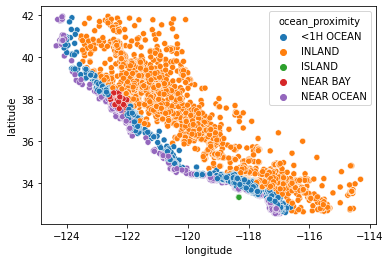

In [60]:
sns.scatterplot(data=data_df, x="longitude", y="latitude", hue="ocean_proximity")